<a href="https://colab.research.google.com/github/tejashreereddyy/FMML-Project-and-Labs/blob/main/AIML_III_Module_02_Lab_01_Basic_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 2: Appreciating, Interpreting and Visualizing Data

Lab 1: Basic Plots

Question: Interpret the plot below. List all the interpretations point by point using the plot below.
Some pointers:

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

3) Do you think the body-style of a car can be a good predictor for its price?

Interpretation of the Plot

Maximum/Minimum Values for Each Body Type:

Sedan: The price ranges from approximately $5,000 to $30,000. There are some outliers beyond $30,000.

Hatchback: The price ranges from approximately $5,000 to $15,000, with many outliers.

Wagon: The price ranges from approximately $6,000 to $18,000.

Hardtop: The price ranges from approximately $7,000 to $12,000.

Convertible: The price ranges from approximately $8,000 to $35,000.

Costliest Body-Type:

Based on the maximum values, convertibles appear to be the costliest, reaching up to $35,000.
Sedans also have high maximum values but with significant outliers.
Interquartile Range Consideration:

Convertibles not only have the highest maximum prices but also a wide interquartile range (IQR), indicating a higher overall price range.
Sedans have a large IQR, suggesting a wide range of prices, but their median price is lower than that of convertibles.
Hatchbacks have the lowest median and IQR, indicating they are generally cheaper.
Wagons and hardtops have moderate IQRs and median prices.

Predictor for Car Price:

The body style of a car can be a good predictor for its price as there are distinct differences in the price ranges and medians across different body styles.
Convertibles and sedans tend to be more expensive, while hatchbacks are generally cheaper.
This variation in price by body style suggests that body style is an important factor in determining car prices.







Exercise:

Plot the jointplot for a feature which has negative correlation with the target variable "price".

To identify a feature that has a negative correlation with the target variable "price," we can calculate the correlation between "price" and each of the numeric features listed. Once we find a feature with a negative correlation, we can plot a jointplot for that feature against "price."

We can approach this task by the following ways:

Load the dataset.

Calculate the correlation between "price" and each of the numeric features.

Identify the feature with a negative correlation.

Plot the jointplot for the feature with the strongest negative correlation.


symboling           -0.082391
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543436
stroke               0.082310
compression-ratio    0.071107
horsepower           0.810533
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64


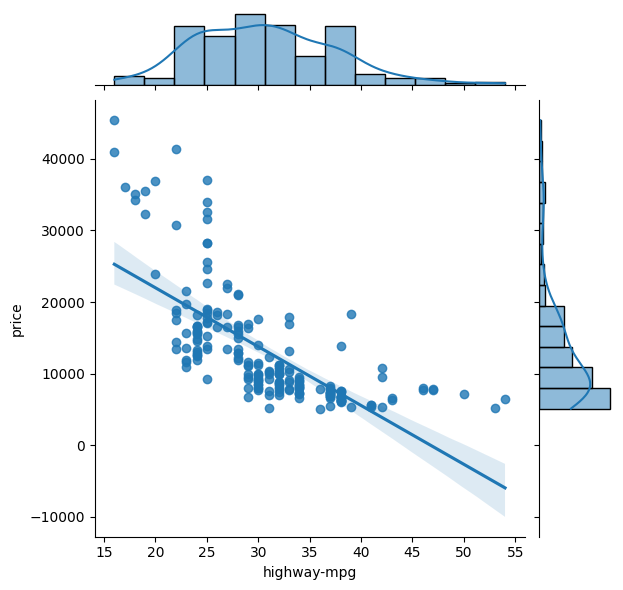

In [ ]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data)

# List of numeric features
numeric_features = ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                    'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                    'peak-rpm', 'city-mpg', 'highway-mpg']

# Ensure the price column is numeric (convert if necessary)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Replace '?' with NaN and convert columns to numeric
df.replace('?', np.nan, inplace=True)
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation between each numeric feature and the target variable 'price'
correlations = df[numeric_features + ['price']].corr()['price']

# Find the feature with the strongest negative correlation
negative_corr_feature = correlations.drop('price').idxmin()

# Print the correlation values
print(correlations)

# Plot the jointplot for the feature with the strongest negative correlation
sns.jointplot(x=negative_corr_feature, y='price', data=df, kind='reg')
plt.show()


Exercise 2:

Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots.
Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

symboling           -0.082391
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543436
stroke               0.082310
compression-ratio    0.071107
horsepower           0.810533
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64


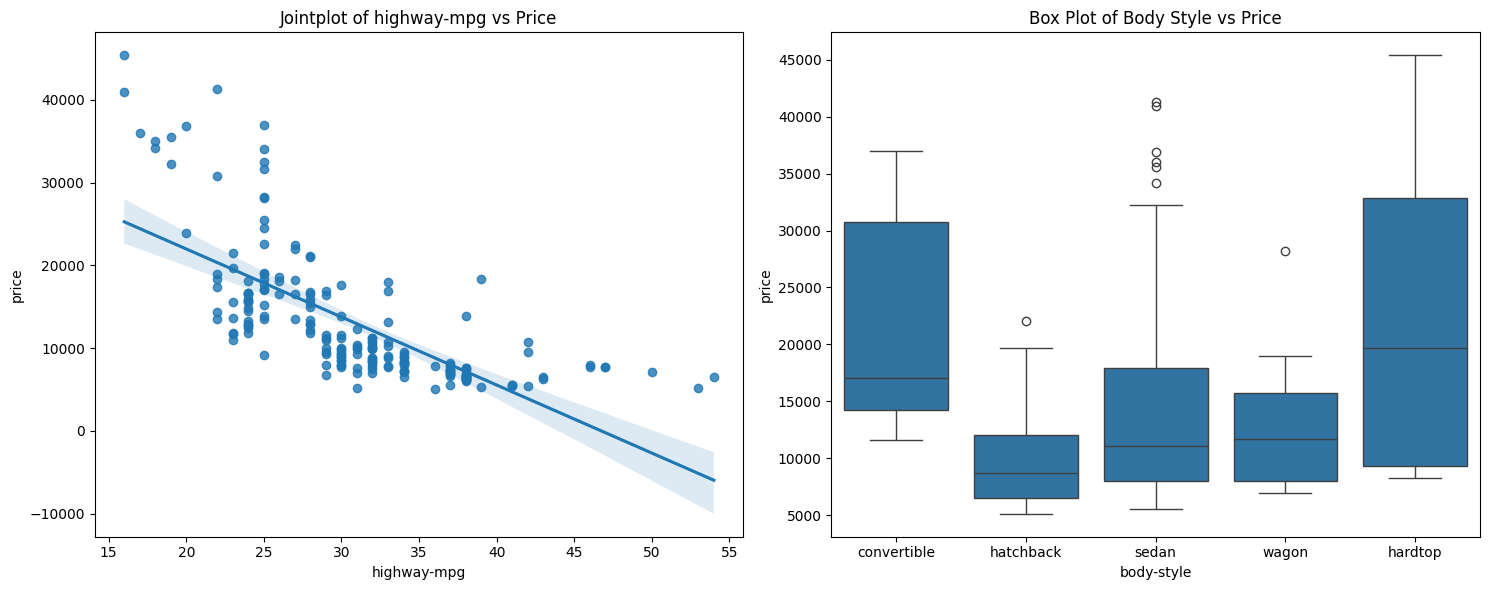

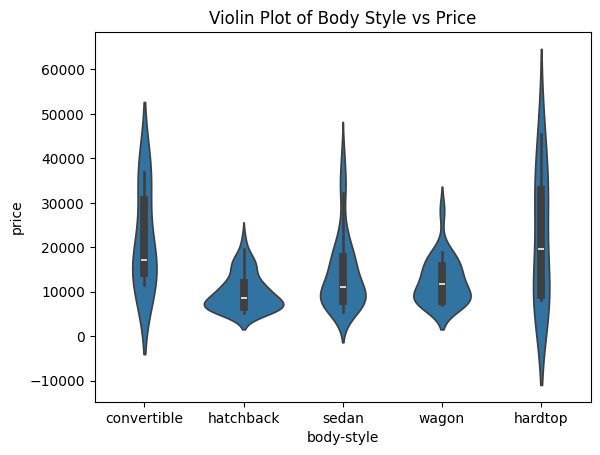

In [ ]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data)

# List of numeric features
numeric_features = ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                    'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                    'peak-rpm', 'city-mpg', 'highway-mpg']

# Ensure the price column is numeric (convert if necessary)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Replace '?' with NaN and convert columns to numeric
df.replace('?', np.nan, inplace=True)
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation between each numeric feature and the target variable 'price'
correlations = df[numeric_features + ['price']].corr()['price']

# Find the feature with the strongest negative correlation
negative_corr_feature = correlations.drop('price').idxmin()

# Print the correlation values
print(correlations)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the jointplot for the feature with the strongest negative correlation
sns.regplot(x=negative_corr_feature, y='price', data=df, ax=axes[0])
axes[0].set_title(f'Jointplot of {negative_corr_feature} vs Price')

# Plot the box plot of body-style vs price
sns.boxplot(x='body-style', y='price', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Body Style vs Price')

plt.tight_layout()
plt.show()

# New plot type from Seaborn: Violin Plot
sns.violinplot(x='body-style', y='price', data=df)
plt.title('Violin Plot of Body Style vs Price')
plt.show()
